In [1]:
# cd to root project

In [2]:
cd ~/mva/recvis/project/cmn

/Users/quentinleroy/mva/recvis/project/cmn


In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import time
import pickle
from skimage.io import imread

from recvis import cmn
from recvis.cmn import imdb_trn, imdb_tst, imdb_val, imdb_unrel, imdb_tst_unrel
from recvis.cmn import Model, Input

from importlib import reload
reload(cmn)

load imdb_trn
load imdb_tst
load imdb_val
load imdb_unrel
load imdb_tst_unrel


<module 'recvis.cmn' from '/Users/quentinleroy/mva/recvis/project/cmn/recvis/cmn.py'>

In [4]:
model = cmn.Model()

imdb_str, imdb_idx = 'imdb_tst_unrel', 4553
model.load_batch(imdb_str, imdb_idx)

start = time.time()
model.compute_scores()
end = time.time()
print(end-start)

6.318092346191406e-05


In [5]:
scores_refactored = pickle.load(open('exp-unrel/results/scores_query_17_refactored', 'rb'))

top 0
score 29.468357


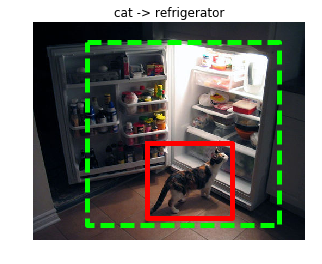

In [8]:
fig, ax = plt.subplots()

idx = -1
idx += 1

top = scores_refactored[idx]

score = top[0]
image_id = top[1]
idx_subj, idx_obj = top[2]
imdb_str, imdb_idx = cmn.idx_from_id(image_id)
i = Input(imdb_str, imdb_idx)

i.draw_pair_boxes(idx_subj, idx_obj, ax)
print("top", idx)
print("score", score)

In [7]:
def hist_scores(idx_rel):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    ax0, ax1, ax2 = axes
    ax0.hist(model.get_score_subj()[10].flatten(), bins=20);
    ax0.set_title('subj scores')
    ax1.hist(model.get_score_rel()[10].flatten(), bins=20);
    ax1.set_title('rel scores')
    ax2.hist(model.get_score_obj()[10].flatten(), bins=20);
    ax2.set_title('obj scores')
    
# model.load_batch(imdb_str, imdb_idx) 
# model.compute_scores()
# hist_scores(17)

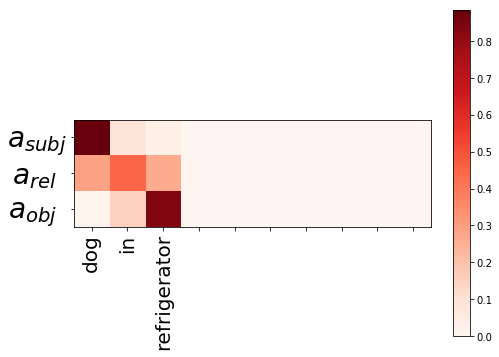

In [17]:
model.draw_attention_weights(17)

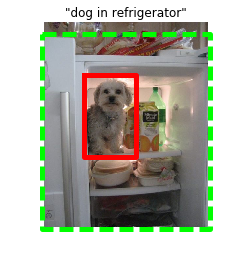

In [11]:
ax = plt.gca()
Input(*cmn.idx_from_id(2418741)).draw_relation(0, ax=ax)
plt.savefig('')

In [13]:
imdb_str, imdb_idx = 'imdb_tst', 1
model.load_batch(imdb_str, imdb_idx)

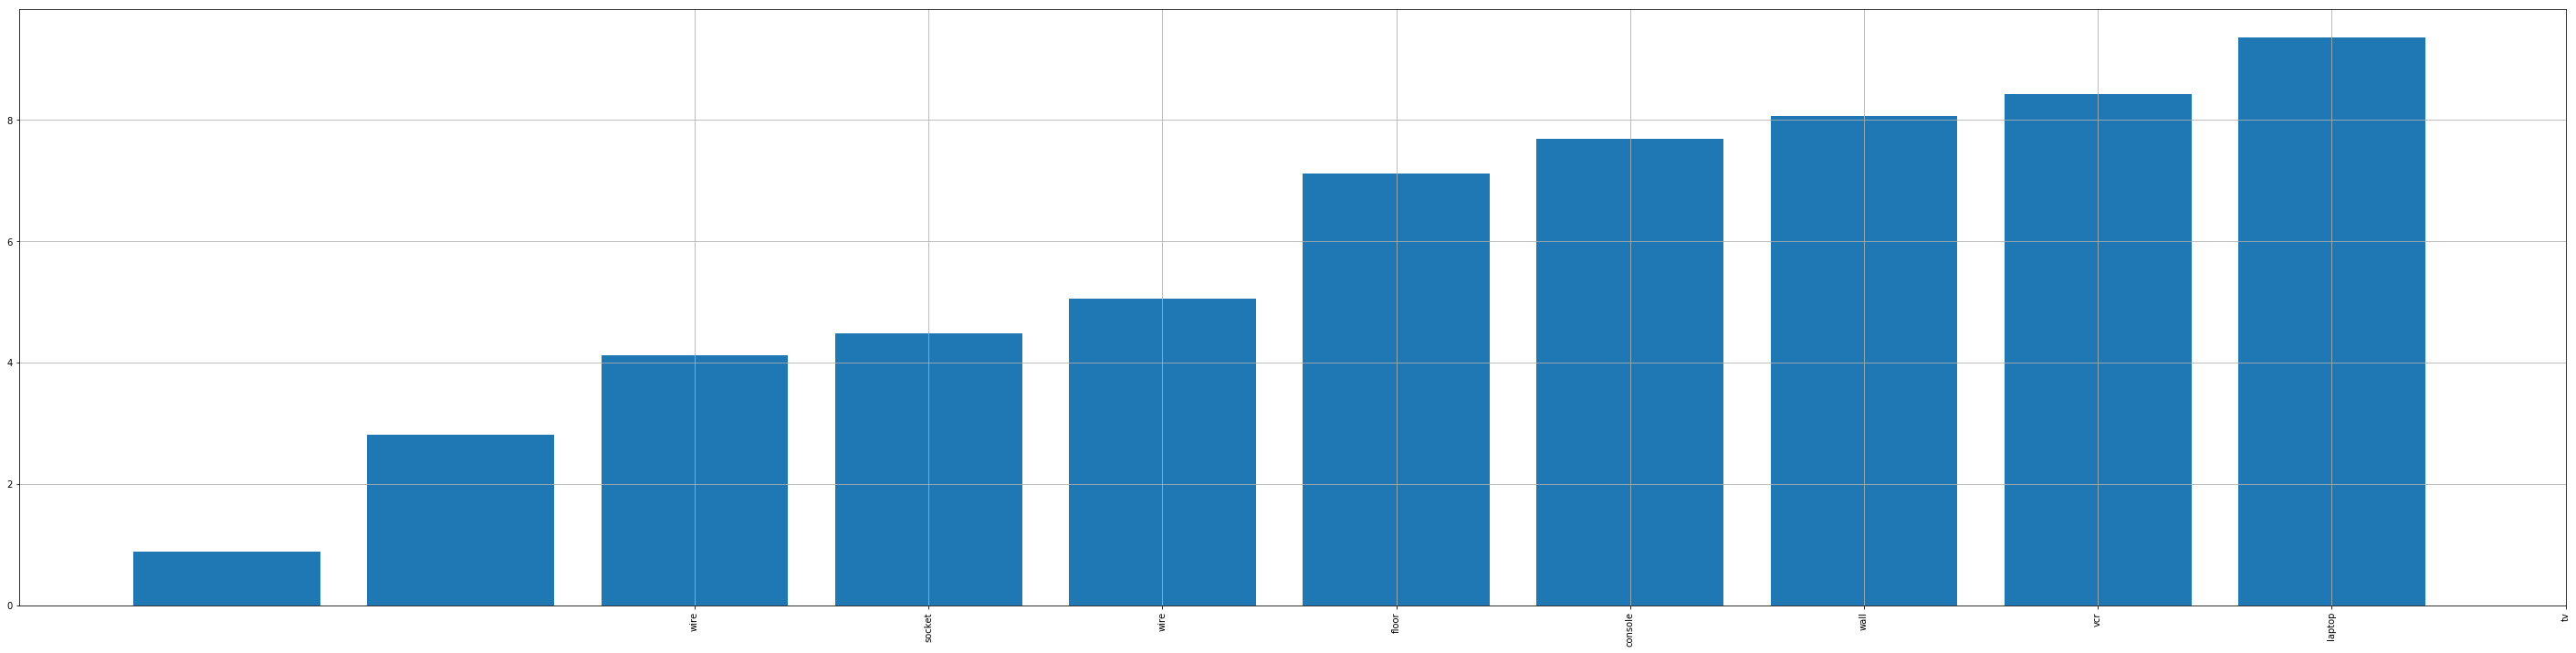

In [15]:
model.draw_scores_subj(1)

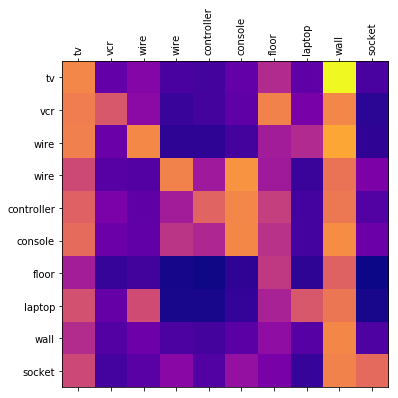

In [21]:
model.draw_scores_rel(1, figsize=(10, 6))

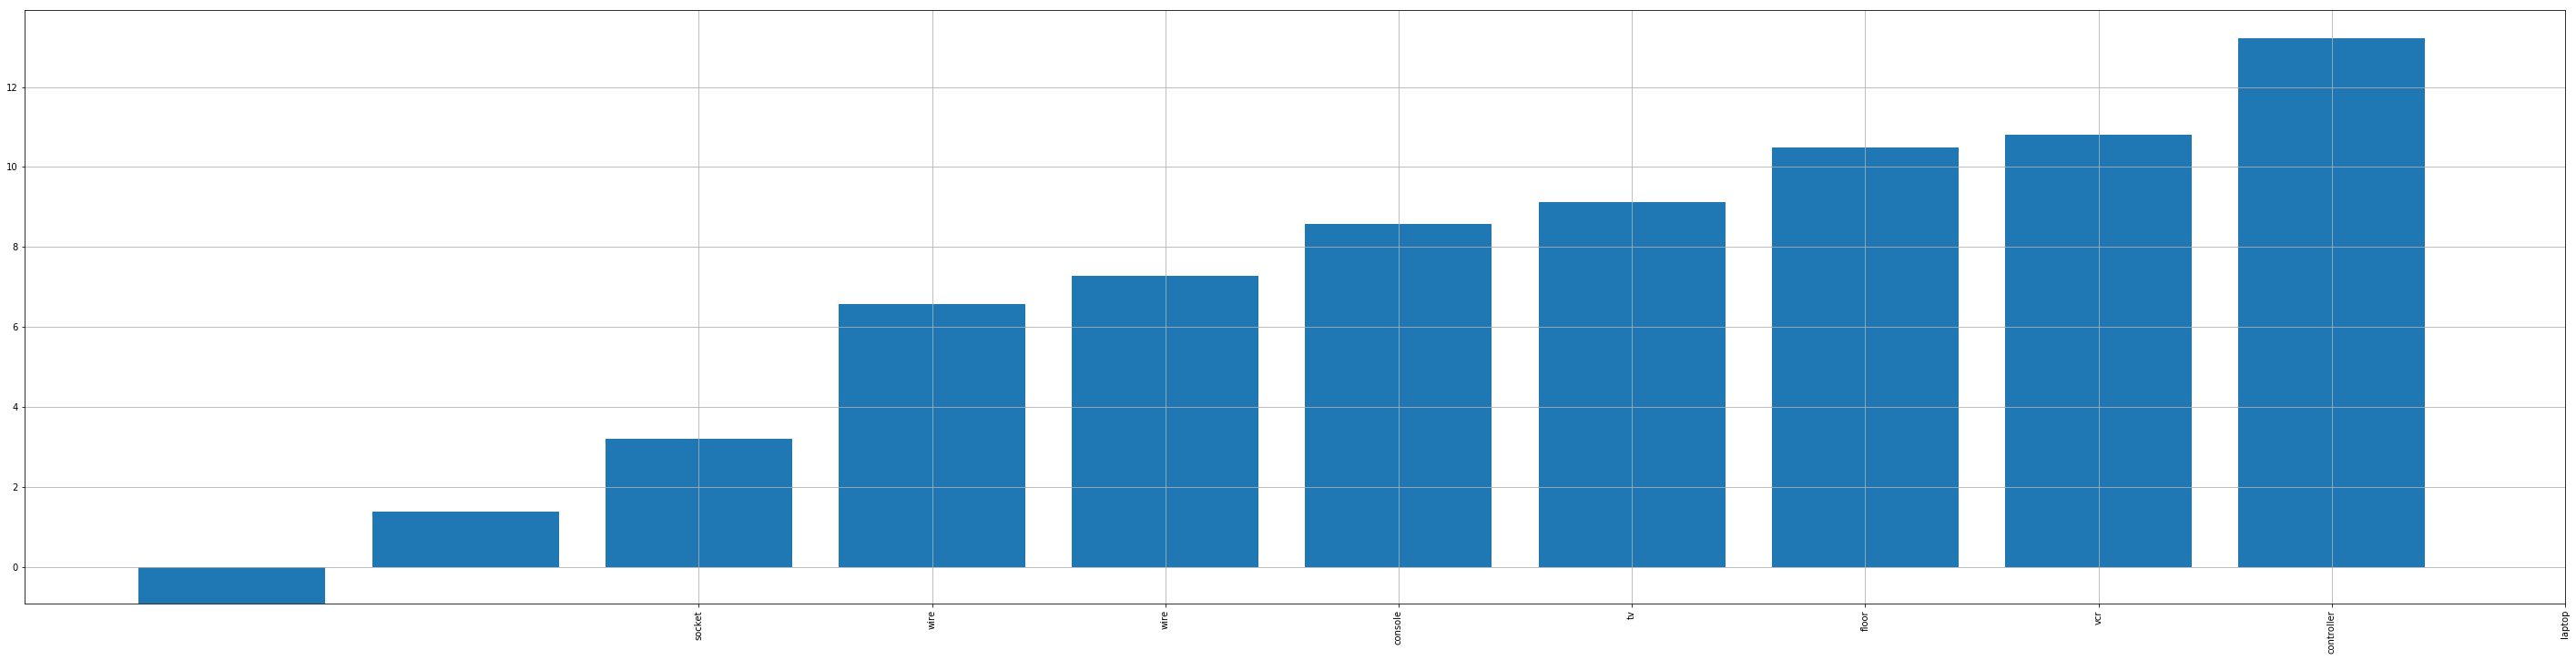

In [17]:
model.draw_scores_obj(1)

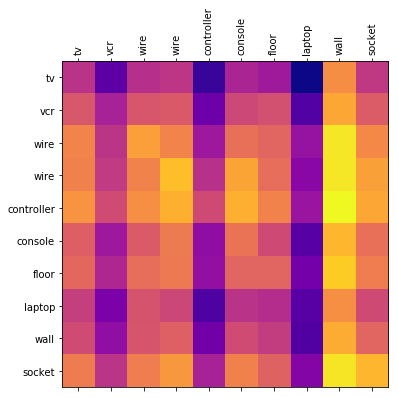

In [20]:
model.draw_scores(1, figsize=(10, 6))

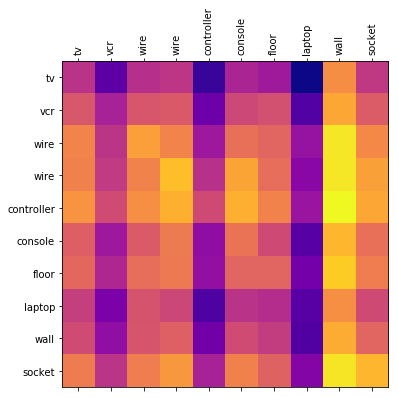

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

objects_names = [name[0] for name in cmn.ids_objects[cmn.id_from_idx(imdb_str, imdb_idx)]]
ax.matshow(model.get_score()[1, :, :, 0], cmap=plt.get_cmap('plasma'))
plt.xticks(range(len(objects_names)), objects_names, rotation=90);
plt.yticks(range(len(objects_names)), objects_names);

6


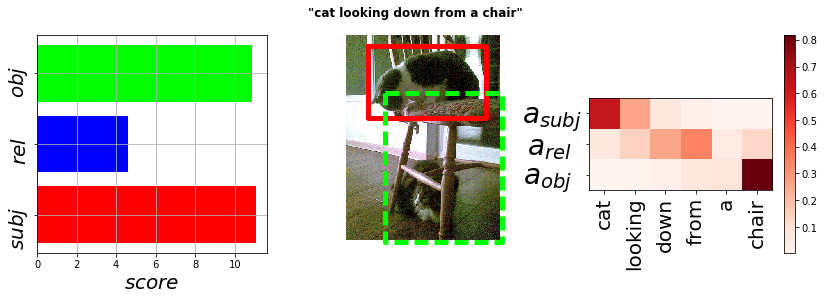

In [31]:
# produce cat image for abstract
fig, axes = plt.subplots(1, 3, gridspec_kw = {'width_ratios':[1, 1, 1]}, figsize=(14, 4))

ax0, ax1, ax2 = axes
idx_expr = 7
imdb_str, imdb_idx = 'imdb_trn', 54758
model.load_batch(imdb_str, imdb_idx)
model.compute_scores()
i = Input(imdb_str, imdb_idx)
idx_subj = i.mapped_rels[idx_expr][0]
idx_obj = i.mapped_rels[idx_expr][1]
expr = i.rels[idx_expr].__str__()
num_words = sum([len(i.mapped_rels[idx_expr][idx_n].split(' ')) for idx_n in [2, 3, 4]])
model.draw_expr_score(idx_expr, idx_subj, idx_obj, ax0)
i.draw_relation(idx_expr, ax1, set_title=False)
#ax1.set_title('\"cat looking down from a chair\"', fontsize=13)
model.draw_attention_weights(idx_expr, ax=ax2, num_words=num_words)

#plt.axis('off')
plt.suptitle("\"" + expr + "\"", fontweight='bold', fontsize=12)
# plt.savefig('../report/fig/cat.pdf')

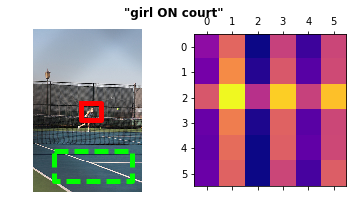

In [32]:
# produce girl image for introduction
fig, axes = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(6, 3))

ax0, ax1 = axes
idx_expr = 3
imdb_str, imdb_idx = 'imdb_tst', 2668
model.load_batch(imdb_str, imdb_idx)
model.compute_scores()
i = Input(imdb_str, imdb_idx)
idx_subj = i.mapped_rels[idx_expr][0]
idx_obj = i.mapped_rels[idx_expr][1]
expr = i.rels[idx_expr].__str__()
num_words = sum([len(i.mapped_rels[idx_expr][idx_n].split(' ')) for idx_n in [2, 3, 4]])
#model.draw_expr_score(idx_expr, idx_subj, idx_obj, ax0)
i.draw_relation(idx_expr, ax0, set_title=False)
#model.draw_attention_weights(idx_expr, ax=ax2, num_words=num_words)
ax1.matshow(model.get_score()[idx_expr, :, :, 0], cmap=plt.get_cmap('plasma'))
#plt.axis('off')
plt.suptitle("\"" + expr + "\"", fontweight='bold', fontsize=12)
# plt.savefig('../report/fig/girl.pdf')

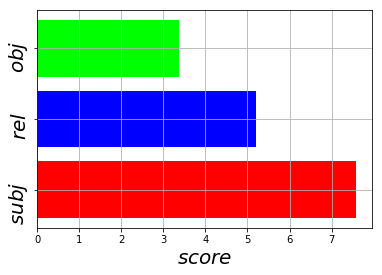

In [345]:
s_subj, s_rel, s_obj = model.s_subj, model.s_rel, model.s_obj

num_bboxes = s_subj.shape[1]
idx_expr = 7
idx_subj, idx_obj = 0, 1
s_subj = s_subj[idx_expr].reshape(num_bboxes)
s_obj = s_obj[idx_expr].reshape(num_bboxes)
s_rel = s_rel[idx_expr].reshape(num_bboxes, num_bboxes)

s_subj = s_subj[idx_subj]
s_obj = s_obj[idx_obj]
s_rel = s_rel[idx_subj, idx_obj]

plt.barh(range(3), [s_subj, s_rel, s_obj], color=['#FF0000', 'blue', '#00FF00'])
plt.yticks(range(3), ['$subj$', '$rel$', '$obj$'], rotation=90, fontsize=20)
plt.xlabel('$score$', fontsize=20)
plt.grid()

# Examples on Visual Genome

## Example 1

In [483]:
imdb_str, imdb_idx = 'imdb_tst', 543
i = Input(imdb_str, imdb_idx)
for idx_rel, rel in enumerate(i.rels):
    print(idx_rel, rel, end=' ')

0 man holding soda 1 man holding cigarette 2 man riding down 3 man WEARING jeans 4 man WEARING hooded jacket 5 man IN grey shirt 6 man holding can 7 man with cigarette 8 man IN chair 9 man with ball cap 10 structure behind men 11 man WEARING jeans 12 ramp made of wood 13 men WEARING sneakers 14 skull ON skateboard 15 man WEARING cap 16 man ON ramp 17 man WEARING shirt 18 man WEARING jeans 19 man holding can 20 people watching skateboarder 21 skateboard under skater 22 wheels ON skateboard 23 beams ON ceiling 24 boy IN chair 25 wood skateboard ramp 26 door behind crowd 27 man WEARING sweatshirt 28 white writing on shirt 29 skull ON skateboard 

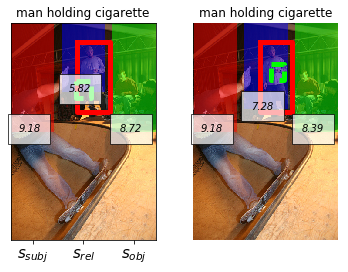

In [530]:
fig, axes = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(6, 4))

ax, ax1 = axes

idx_expr = 1
idx_subj_gt = i.mapped_rels[idx_expr][0]
idx_obj_gt = i.mapped_rels[idx_expr][1]

model.load_batch(imdb_str, imdb_idx)
model.compute_scores()

prediction = model.predict(idx_expr)
num_bboxes = len(model.batch['bbox_batch'])
idx_subj_predicted, idx_obj_predicted = prediction // num_bboxes, prediction % num_bboxes

scores_subj, scores_rel, scores_obj = model.s_subj[idx_expr], model.s_rel[idx_expr], model.s_obj[idx_expr]

score_subj_gt = scores_subj[idx_subj_gt]
score_rel_gt = scores_rel[idx_subj_gt, idx_obj_gt]
score_obj_gt = scores_obj[0][idx_obj_gt]

i.draw_pair_boxes(idx_subj_gt, idx_obj_gt, ax, set_title=False)
im = i.im
im_width = im.shape[1]
im_height = im.shape[0]
mult = im_height/max([score_subj_gt, score_rel_gt, score_obj_gt])*0.5
bar_width = im_width*0.9/3
bar_locations = np.linspace(0 + bar_width/2, im.shape[1] - bar_width/2, 3)
bar_heights = [score_subj_gt*mult, score_rel_gt*mult, score_subj_gt*mult]
ax.bar(bar_locations, bar_heights, 
       width=bar_width, alpha=0.5, color=['#FF0000', 'blue', '#00FF00'])

ax.text(bar_locations[0]-bar_width/3, bar_heights[0], '%2.2f' % score_subj_gt, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
ax.text(bar_locations[1]-bar_width/3, bar_heights[1], '%2.2f' % score_rel_gt, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
ax.text(bar_locations[2]-bar_width/3, bar_heights[2], '%2.2f' % score_obj_gt, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})

ax.imshow(im)
ax.set_xticks(bar_locations)
ax.set_xticklabels(['$s_{subj}$', '$s_{rel}$', '$s_{obj}$'], fontweight='bold', fontsize=15)
ax.yaxis.set_visible(False)
ax.set_title('man holding cigarette')


# ax1
score_subj_predicted = scores_subj[idx_subj_predicted]
score_rel_predicted = scores_rel[idx_subj_predicted, idx_obj_predicted]
score_obj_predicted = scores_obj[0][idx_obj_predicted]

i.draw_pair_boxes(idx_subj_predicted, idx_obj_predicted, ax1, set_title=False)
im = i.im
im_width = im.shape[1]
im_height = im.shape[0]
mult = im_height/max([score_subj_predicted, score_rel_predicted, score_obj_predicted])*0.5
bar_width = im_width*0.9/3
bar_locations = np.linspace(0 + bar_width/2, im.shape[1] - bar_width/2, 3)
bar_heights = [score_subj_predicted*mult, score_rel_predicted*mult, score_subj_predicted*mult]
ax1.bar(bar_locations, bar_heights, 
       width=bar_width, alpha=0.5, color=['#FF0000', 'blue', '#00FF00'])

ax1.text(bar_locations[0]-bar_width/3, bar_heights[0], '%2.2f' % score_subj_predicted, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
ax1.text(bar_locations[1]-bar_width/3, bar_heights[1], '%2.2f' % score_rel_predicted, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
ax1.text(bar_locations[2]-bar_width/3, bar_heights[2], '%2.2f' % score_obj_predicted, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})

ax1.imshow(im)
ax1.set_xticks(bar_locations)
ax1.set_xticklabels(['$s_{subj}$', '$s_{rel}$', '$s_{obj}$'], fontweight='bold', fontsize=15)
ax1.yaxis.set_visible(False)
ax1.set_title('man holding cigarette')

ground truth
4 9
predicted
4 3
"man holding cigarette"


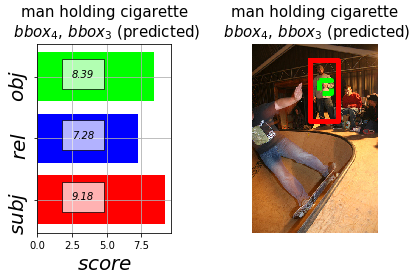

In [571]:
fig, axes = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1.5]}, figsize=(6, 4))

idx_expr = 1 
idx_subj_gt = i.mapped_rels[idx_expr][0]
idx_obj_gt = i.mapped_rels[idx_expr][1]
print('ground truth')
print(idx_subj_gt, idx_obj_gt)
model.load_batch(imdb_str, imdb_idx)
model.compute_scores()
prediction = model.predict(idx_expr)
num_bboxes = len(model.batch['bbox_batch'])
idx_subj_predicted, idx_obj_predicted = prediction // num_bboxes, prediction % num_bboxes
print('predicted')
print(idx_subj_predicted, idx_obj_predicted)

ax0, ax1 = axes

#ax0
model.draw_expr_score(idx_expr, idx_subj_predicted, idx_obj_predicted, ax0)

#ax1
i.draw_pair_boxes(idx_subj_predicted, idx_obj_predicted, ax1)

#['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']
ax0.set_title('man holding cigarette\n $bbox_4$, $bbox_3$ (predicted)', fontweight='light', fontsize=15)
ax1.set_title('man holding cigarette\n $bbox_4$, $bbox_3$ (predicted)', fontweight='light', fontsize=15)

ax0.text(2.5, 0, '%2.2f' % score_subj_predicted, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
ax0.text(2.5, 1, '%2.2f' % score_rel_predicted, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
ax0.text(2.5, 2, '%2.2f' % score_obj_predicted, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})

#plt.suptitle('\"' + i.rels[idx_expr].__str__() + '\"', fontweight='bold', fontsize=20)
plt.tight_layout()
print('\"' + i.rels[idx_expr].__str__() + '\"')
plt.tight_layout()
# plt.savefig('../report/fig/examples/cigarette-predicted.png')

ground truth
4 9
predicted
4 3
"man holding cigarette"


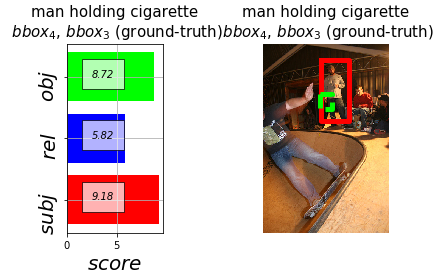

In [570]:
fig, axes = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1.5]}, figsize=(6, 4))

idx_expr = 1 
idx_subj_gt = i.mapped_rels[idx_expr][0]
idx_obj_gt = i.mapped_rels[idx_expr][1]
print('ground truth')
print(idx_subj_gt, idx_obj_gt)
model.load_batch(imdb_str, imdb_idx)
model.compute_scores()
prediction = model.predict(idx_expr)
num_bboxes = len(model.batch['bbox_batch'])
idx_subj_predicted, idx_obj_predicted = prediction // num_bboxes, prediction % num_bboxes
print('predicted')
print(idx_subj_predicted, idx_obj_predicted)

ax0, ax1 = axes

#ax0
model.draw_expr_score(idx_expr, idx_subj_gt, idx_obj_gt, ax0)

#ax1
i.draw_pair_boxes(idx_subj_gt, idx_obj_gt, ax1)

#['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']
ax0.set_title('man holding cigarette\n $bbox_4$, $bbox_3$ (ground-truth)', fontweight='light', fontsize=15)
ax1.set_title('man holding cigarette\n $bbox_4$, $bbox_3$ (ground-truth)', fontweight='light', fontsize=15)

ax0.text(2.5, 0, '%2.2f' % score_subj_gt, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
ax0.text(2.5, 1, '%2.2f' % score_rel_gt, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
ax0.text(2.5, 2, '%2.2f' % score_obj_gt, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})

#plt.suptitle('\"' + i.rels[idx_expr].__str__() + '\"', fontweight='bold', fontsize=20)
plt.tight_layout()
print('\"' + i.rels[idx_expr].__str__() + '\"')
plt.tight_layout()
# plt.savefig('../report/fig/examples/cigarette-gt.png')

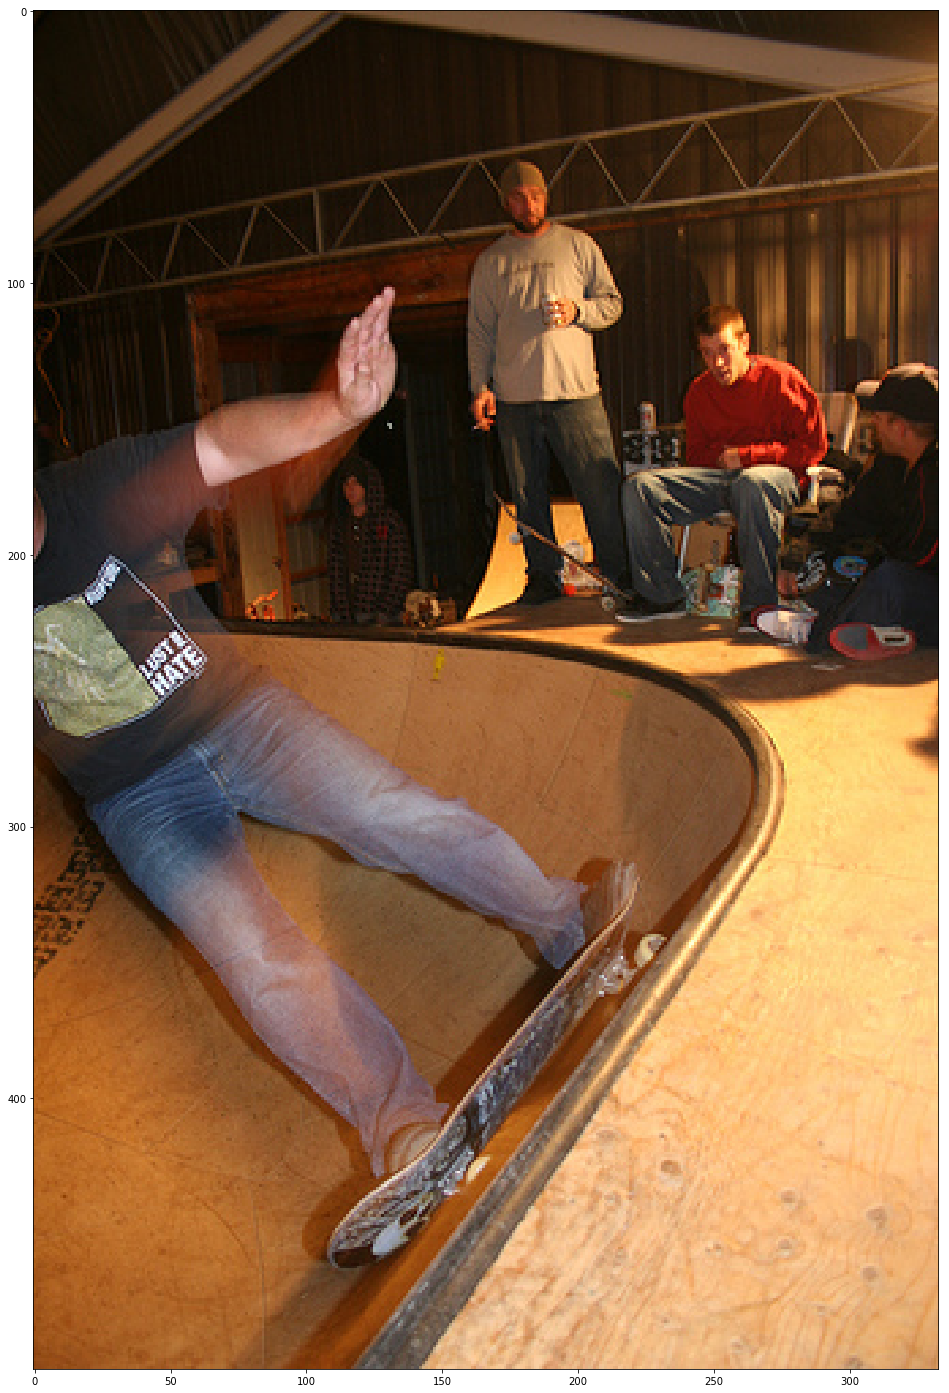

In [557]:
plt.figure(figsize=(50, 25))
plt.imshow(i.im)

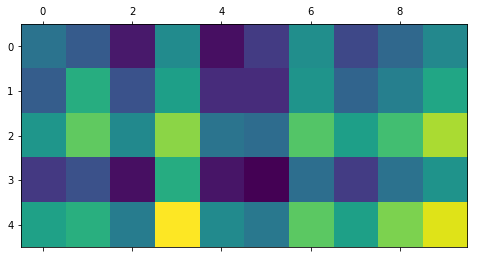

In [550]:
plt.matshow(model.s_final[idx_expr].reshape(num_bboxes, num_bboxes)[:5, :10])


ground truth
4 9
predicted
4 3
"man holding cigarette"


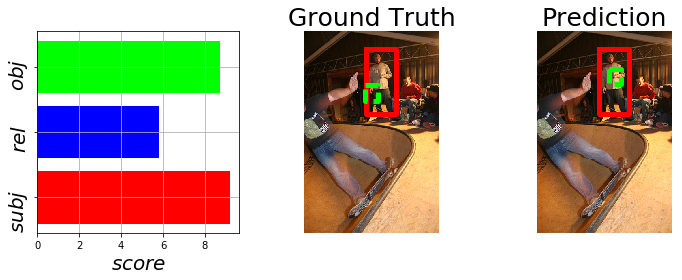

In [510]:
fig, axes = plt.subplots(1, 3, gridspec_kw = {'width_ratios':[1, 1, 1]}, figsize=(10, 4))

idx_expr = 1 
idx_subj = i.mapped_rels[idx_expr][0]
idx_obj = i.mapped_rels[idx_expr][1]
print('ground truth')
print(idx_subj, idx_obj)

idx_expr_cigarette = 1 # man holding cigarette
idx_cigarette = i.mapped_rels[idx_expr_cigarette][1]
idx_expr_soda = 0 # man holding soda
idx_soda = i.mapped_rels[idx_expr_soda][1]

ax0, ax1, ax2 = axes

#ax0
model.draw_expr_score(idx_expr, idx_subj, idx_obj, ax0)

#ax1
i.draw_relation(idx_expr, ax1)

model.load_batch(imdb_str, imdb_idx)
model.compute_scores()
prediction = model.predict(idx_expr)
num_bboxes = len(model.batch['bbox_batch'])
idx_subj_predicted, idx_obj_predicted = prediction // num_bboxes, prediction % num_bboxes
print('predicted')
print(idx_subj_predicted, idx_obj_predicted)
i.draw_prediction(idx_expr, model.predict(idx_expr), ax2)

#['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']
ax1.set_title('Ground Truth', fontweight='light', fontsize=25)
ax2.set_title('Prediction', fontweight='light', fontsize=25)
#plt.suptitle('\"' + i.rels[idx_expr].__str__() + '\"', fontweight='bold', fontsize=20)
plt.tight_layout()
print('\"' + i.rels[idx_expr].__str__() + '\"')

In [ ]:
for rel in i.rels

In [512]:
idx_expr = 1 
idx_subj = i.mapped_rels[idx_expr][0]
print(i.rels[idx_expr].__str__())
print('score man', model.s_subj[idx_expr][4])
print('score (man) holding (cigarette)', model.s_rel[idx_expr][4, 9])
print('score (man) holding (soda)', model.s_rel[idx_expr][4, 3])
print('score soda', model.s_obj[idx_expr][0][3])
print('score cigarette', model.s_obj[idx_expr][0][9])

idx_expr = 0
idx_subj = i.mapped_rels[idx_expr][0]
print(i.rels[idx_expr].__str__())
print('score man', model.s_subj[idx_expr][4])
print('score holding', model.s_rel[idx_expr][idx_subj, idx_soda])
print('score soda', model.s_obj[idx_expr][0][idx_soda])
print('score cigarette', model.s_obj[idx_expr][0][idx_cigarette])

man holding cigarette
score man [[ 9.18324184]]
score (man) holding (cigarette) [ 5.82326412]
score (man) holding (soda) [ 7.28168726]
score soda [ 8.38701534]
score cigarette [ 8.72423553]
man holding soda
score man [[ 9.18573666]]
score holding [ 7.1172328]
score soda [ 6.44234514]
score cigarette [ 7.08170938]


In [488]:
idx_expr_cigarette = 1 # man holding cigarette
idx_cigarette = i.mapped_rels[idx_expr_cigarette][1]
idx_expr_soda = 0 # man holding soda
idx_soda = i.mapped_rels[idx_expr_soda][1]

In [171]:
imdb_str, imdb_idx = 'imdb_tst', 543
idx_expr = 1
model.load_batch(imdb_str, imdb_idx)
print(i.rels[idx_expr].__str__())
# score cigarette
# idx cigarette box
idx_expr_cigarette = 1 # man holding cigarette
idx_subj = i.mapped_rels[idx_expr_cigarette][0]
idx_obj = i.mapped_rels[idx_expr_cigarette][1]
print(idx_subj, idx_obj)
print('score man', model.get_expr_score_obj(idx_expr)[idx_subj])
print('score holding', model.get_expr_score_rel(idx_expr)[idx_subj, idx_obj])
print('score cigarette', model.get_expr_score_obj(idx_expr)[idx_obj])

# score soda
# idx soda box
idx_expr_soda = 0 # man holding soda
idx_obj = i.mapped_rels[idx_expr_soda][1]
print('score soda', model.get_expr_score_obj(idx_expr)[idx_obj])

man holding cigarette
4 9
score man -1.78762
score holding 5.82326
score cigarette 8.72424
score soda 8.38702


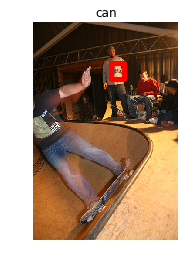

In [143]:
fig, ax = plt.subplots()

i.draw_box(3, ax)

In [141]:
i.mapped_rels[idx_expr_soda][1]

3

The relationship "hold" gives higher score for the object in left hand of the man. The highest scoring object is indeed a box bounding 'man' and the highest scoring object is the box bounding 'cigarette'.

## Example 2

In [ ]:
imdb_str, imdb_idx = 'imdb_tst', 543

idx_expr = 1
i = Input(imdb_str, imdb_idx)
idx_subj = i.mapped_rels[idx_expr][0]
idx_obj = i.mapped_rels[idx_expr][1]

fig, axes = plt.subplots(1, 3, gridspec_kw = {'width_ratios':[1, 1, 1]}, figsize=(10, 4))

ax0, ax1, ax2 = axes

#ax0
model.draw_expr_score(idx_expr, idx_subj, idx_obj, ax0)

#ax1
i.draw_relation(idx_expr, ax1)

model.load_batch(imdb_str, imdb_idx)
model.compute_scores()
i.draw_prediction(idx_expr, model.predict(idx_expr), ax2)

print(['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'])
ax1.set_title('Ground Truth', fontweight='light', fontsize=25)
ax2.set_title('Prediction', fontweight='light', fontsize=25)
#plt.suptitle('\"' + i.rels[idx_expr].__str__() + '\"', fontweight='bold', fontsize=20)
plt.tight_layout()

# Count the number of duplicates

In [33]:
num_duplicates = []
for i in imdb_tst:
    uniques = []
    duplicates = []
    for mapped_rel in i['mapped_rels']:
        if mapped_rel not in uniques:
            uniques.append(mapped_rel)
        else:
            duplicates.append(mapped_rel)
    assert len(uniques) + len(duplicates) == len(i['mapped_rels']), 'error !'
    num_duplicates.append(len(duplicates))

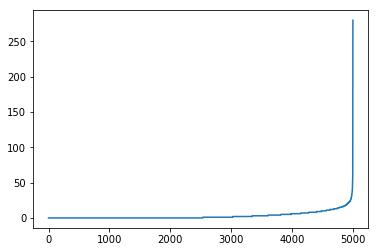

In [34]:
plt.plot(sorted(num_duplicates));

In [36]:
from collections import Counter
print(Counter(imdb_tst[467]['mapped_rels']))
idx_unique_relationships = []
for idx, element in enumerate(imdb_tst[467]['mapped_rels']):
    if element not in [imdb_tst[467]['mapped_rels'][ii] for ii in idx_unique_relationships]:
        idx_unique_relationships.append(element[0])

Counter({(0, 8, 'package', 'OF', 'device'): 36, (1, 9, 'package', 'OF', 'device'): 36, (2, 10, 'package', 'OF', 'device'): 36, (3, 11, 'package', 'OF', 'device'): 36, (4, 12, 'package', 'OF', 'device'): 36, (5, 13, 'package', 'OF', 'device'): 36, (6, 14, 'package', 'OF', 'device'): 36, (7, 15, 'package', 'OF', 'device'): 36})


"package OF device"


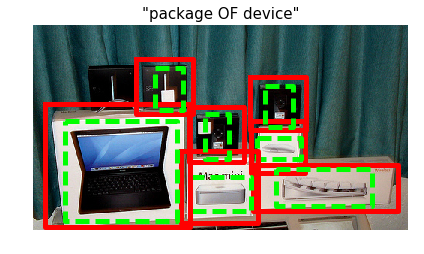

In [37]:
# produce image for duplicates section

imdb_str, imdb_idx = 'imdb_tst', 467

idx_expr = 4
i = Input(imdb_str, imdb_idx)
idx_subj = i.mapped_rels[idx_expr][0]
idx_obj = i.mapped_rels[idx_expr][1]

fig, axes = plt.subplots(1, 1, gridspec_kw = {'width_ratios':[1]}, figsize=(6, 4))

ax0 = axes

#ax1
for idx_expr in [0, 1, 2, 3, 4, 5, 6]:
    i.draw_relation(idx_expr, ax0)



#['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']
ax0.set_title('\"package OF device\"', fontweight='light', fontsize=15)
#plt.suptitle('\"' + i.rels[idx_expr].__str__() + '\"', fontweight='bold', fontsize=20)
plt.tight_layout()
print('\"' + i.rels[idx_expr].__str__() + '\"')
plt.tight_layout()
# plt.savefig('../report/fig/package.png')

## how read batch works

In [3]:
from importlib import reload
import util

from recvis.cmn import imdb_unrel

from models import visgeno_attention_model, spatial_feat, fastrcnn_vgg_net
from util.visgeno_rel_train.rel_data_reader import DataReader
reload(util)

imdb_tmp = imdb_unrel[:10]

imdb_tmp[0]['mapped_rels'] = []

np.save('imdb_tmp', imdb_tmp)

# imdb_file = 'exp-visgeno-rel/data/imdb/imdb_tst.npy'
imdb_file = 'imdb_tmp.npy'
vocab_file = './word_embedding/vocabulary_72700.txt'
im_mean = visgeno_attention_model.fastrcnn_vgg_net.channel_mean
reader = DataReader(imdb_file, vocab_file, im_mean, shuffle=False, max_bbox_num=10000, max_rel_num=10000)

for i in range(reader.num_batch):
    batch = reader.read_batch()
    sleep(0.5)
    print(batch['image_id'])

In [39]:
reader.num_batch

10

In [38]:
batch = reader.read_batch()

data reader: epoch = 2, batch = 7 / 10
data reader: skipped an image. no relationship annotations for image ./exp-unrel/unrel-dataset/images/1.jpg


In [247]:
len(batch['bbox_batch'])

14

In [610]:
N = 0
image_ids = []
for n_iter in range(4871):
    batch = reader.read_batch()
    if reader.n_epoch > 1:
        break
    if len(batch['bbox_batch']) <= 120:
        N += batch['text_seq_batch'].shape[1]
        image_ids.append(batch['image_id'])

data reader: epoch = 1, batch = 0 / 5000
data reader: epoch = 1, batch = 1 / 5000
data reader: epoch = 1, batch = 2 / 5000
data reader: epoch = 1, batch = 3 / 5000
data reader: epoch = 1, batch = 4 / 5000
data reader: epoch = 1, batch = 5 / 5000
data reader: epoch = 1, batch = 6 / 5000
data reader: epoch = 1, batch = 7 / 5000
data reader: epoch = 1, batch = 8 / 5000
data reader: epoch = 1, batch = 9 / 5000
data reader: waiting for file input (IO is slow)...
data reader: epoch = 1, batch = 10 / 5000
data reader: waiting for file input (IO is slow)...
data reader: epoch = 1, batch = 11 / 5000
data reader: waiting for file input (IO is slow)...
data reader: epoch = 1, batch = 12 / 5000
data reader: waiting for file input (IO is slow)...
data reader: epoch = 1, batch = 13 / 5000
data reader: waiting for file input (IO is slow)...
data reader: epoch = 1, batch = 14 / 5000
data reader: waiting for file input (IO is slow)...
data reader: epoch = 1, batch = 15 / 5000
data reader: waiting for f

In [611]:
N

113189

In [623]:
sum([len(i['mapped_rels']) for i in imdb_tst]) + sum([len(i['mapped_rels']) for i in imdb_tst[:129]]) - len(imdb_tst[2985]['mapped_rels']) - len(imdb_tst[3748]['mapped_rels'])

116052

In [618]:
for idx, i in enumerate(imdb_tst):
    if len(i['bboxes']) > 120:
        print(idx)

2985
3748


In [603]:
relationships_tst = []
for i in imdb_tst:
    for mapped_rel in i['mapped_rels']:
        relationships_tst.append(mapped_rel)

In [604]:
len(relationships_tst)

113382

In [237]:
1160248 in image_ids

False

In [236]:
imdb_tst[106]['image_id']

1160248

In [245]:
len(np.unique(image_ids))+127

5000

In [243]:
n_total = 0
for idx, i in enumerate(imdb_tst):
    if len(i['mapped_rels'])==0:
        im_id = i['image_id']
        #print(im_id in image_ids)
        n_total += 1
        
print(n_total)

127


# Image retrieval

In [302]:
scores_refactored = pickle.load(open('exp-unrel/results/scores_query_17_refactored', 'rb'))

def top_im_paths(scores_query, n=10):
    scores_query = [(max(s[0][0]), s[1]) for s in scores_query]
    scores_query.sort(key=lambda x: -x[0])
    top_results = scores_query[:n]
    scores = [t[0] for t in top_results]
    visgeno_ids = [t[1] for t in top_results]
    im_paths = []
    for visgeno_id in visgeno_ids:
        imdb_str, imdb_idx = cmn.idx_from_id(visgeno_id)
        if imdb_str == 'imdb_trn':
            im = imdb_trn[imdb_idx]
        elif imdb_str == 'imdb_tst':
            im = imdb_tst[imdb_idx]
        elif imdb_str == 'imdb_val':
            im = imdb_val[imdb_idx]
        elif imdb_str == 'imdb_unrel':
            im = imdb_unrel[imdb_idx]
        else:
            print(visgeno_id)
        im_path = im['im_path']
        im_paths.append(im_path)
    return im_paths

im_paths = top_im_paths(scores, n=15)

top_ids = []
top_scores = []
for score_refactored in scores_refactored[:2000]:
    image_id = score_refactored[1]
    if image_id not in top_ids:
        top_ids.append(image_id)
        top_scores.append(score_refactored)

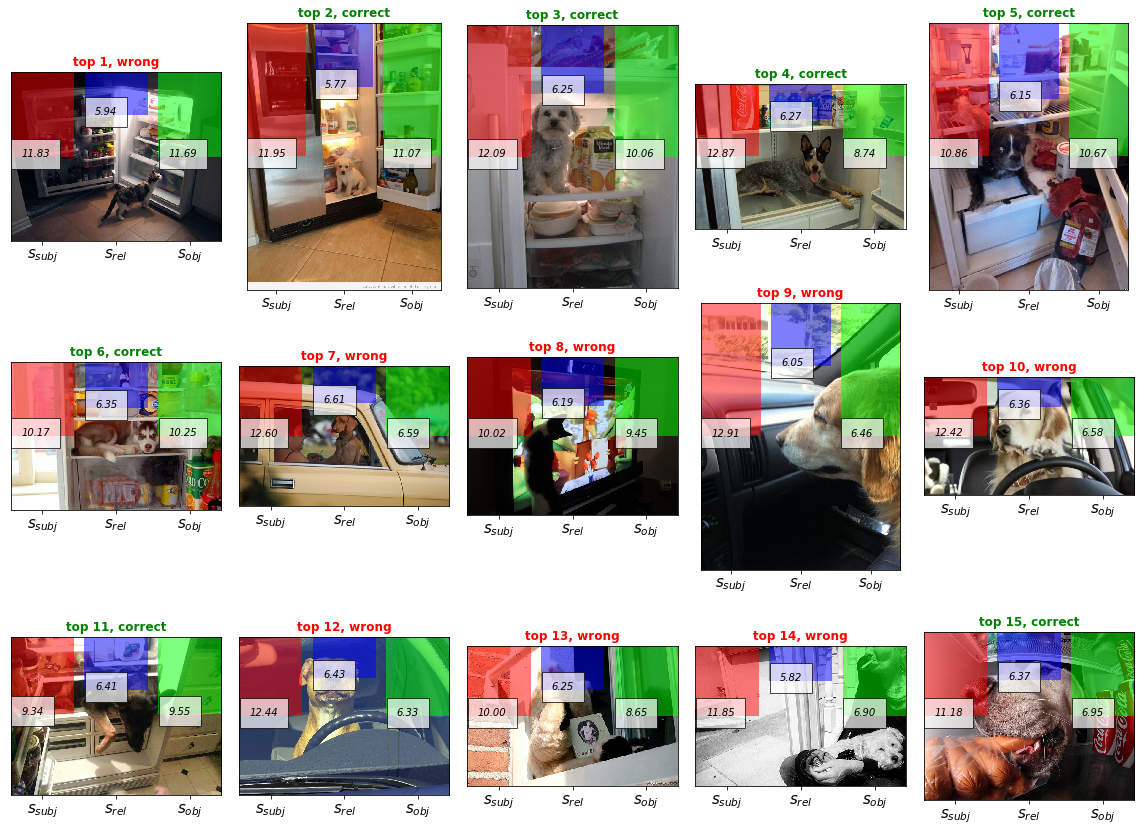

In [481]:
idx_expr = 17 # dog in refrigerator
nrow, ncol = 3, 5
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 12))

top_images = [imread(im_path) for im_path in im_paths]

corrects = [1, 2, 3, 4, 5, 10, 14]
cpt = 0
for i in range(nrow):
    for j in range(ncol):
        im_path = im_paths[cpt]
        image_id = int(top_scores[cpt][1])
        imdb_str, imdb_idx = cmn.idx_from_id(image_id)
        if imdb_str=='imdb_tst':
            pass
        else:
            imdb_idx += 5000
        imdb_str = 'imdb_tst_unrel'
        idx_subj = top_scores[cpt][2][0]
        idx_obj = top_scores[cpt][2][1]
        model.load_batch(imdb_str, imdb_idx)
        model.compute_scores()
        score_subj, score_rel, score_obj = model.s_subj[idx_expr], model.s_rel[idx_expr], model.s_obj[idx_expr]
        num_bboxes = score_subj.shape[0]
        score_subj = score_subj.reshape(num_bboxes)[idx_subj]
        score_obj = score_obj.reshape(num_bboxes)[idx_obj]
        score_rel = score_rel.reshape(num_bboxes, num_bboxes)[idx_subj, idx_obj]
        ax = axes[i, j]
        
        im = top_images[cpt]
        im_width = im.shape[1]
        im_height = im.shape[0]
        mult = im_height/max([score_subj, score_rel, score_obj])*0.5
        bar_width = im_width*0.9/3
        bar_locations = np.linspace(0 + bar_width/2, im.shape[1] - bar_width/2, 3)
        bar_heights = [score_subj*mult, score_rel*mult, score_subj*mult]
        ax.bar(bar_locations, bar_heights, 
               width=bar_width, alpha=0.5, color=['#FF0000', 'blue', '#00FF00'])

        ax.text(bar_locations[0]-bar_width/3, bar_heights[0], '%2.2f' % score_subj, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
        ax.text(bar_locations[1]-bar_width/3, bar_heights[1], '%2.2f' % score_rel, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
        ax.text(bar_locations[2]-bar_width/3, bar_heights[2], '%2.2f' % score_obj, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
        
        ax.imshow(im)
        ax.set_xticks(bar_locations)
        ax.set_xticklabels(['$s_{subj}$', '$s_{rel}$', '$s_{obj}$'], fontweight='bold', fontsize=15)
        ax.autoscale(False)
        ax.yaxis.set_visible(False)
        
        if cpt in corrects:
            ax.set_title('top ' + str(cpt + 1) + ', correct', fontweight='bold', color='green')
        else:
            ax.set_title('top ' + str(cpt + 1) + ', wrong', fontweight='bold', color='red')
        cpt = cpt + 1
        
plt.tight_layout()        
#plt.savefig('../report/fig/top.png')

## Two images for which I ran out of memory

In [573]:
# find images which have more than 120 bboxes
for idx, i in enumerate(imdb_tst):
    if len(i['bboxes'])>=120:
        print(idx)

2985
3748


In [576]:
# compute scores for ('imdb_tst', 2985) and ('imdb_tst', 3748)
model.load_batch('imdb_tst', 2985)
model.compute_scores()

model.load_batch('imdb_tst', 3748)
model.compute_scores()

In [590]:
# compute "precision" for ('imdb_tst', 2985) and ('imdb_tst', 3748)
imdb_str, imdb_idx = 'imdb_tst', 3748
model.load_batch(imdb_str, imdb_idx)
model.compute_scores()

predictions = [model.predict(idx_expr) for idx_expr in range(model.batch['text_seq_batch'].shape[1])]
predictions2 = []
num_bboxes = len(model.batch['bbox_batch'])
for p in predictions:
    subj = p // num_bboxes
    obj = p % num_bboxes
    predictions2.append([subj, obj])
    
ground_truth = []
i = Input(imdb_str, imdb_idx)
for m in i.mapped_rels:
    ground_truth.append([m[0], m[1]])
    
num_corrects = 0
for p, gt in zip(predictions2, ground_truth):
    if p==gt:
        num_corrects += 1
        
print('num_corrects', num_corrects)
print('num_total', len(i.mapped_rels))

num_corrects 1
num_total 52


In [ ]:
1, 94
1, 52

In [591]:
(51409 + 1 + 1 )/ (116059 + 94 + 52)

0.44241641925906805

In [592]:
116059 + 94 + 52

116205

In [593]:
sum([len(i['mapped_rels']) for i in imdb_tst])

113382

In [597]:
[len(i['bboxes']) for i in imdb_tst if len(i['bboxes'])==0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# Precision recall

In [ ]:
corrects = [1, 2, 3, 4, 5, 10, 14]